# Determining Plot Kind

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
tips = sns.load_dataset('tips')

In [10]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

### Categorical Data

- Bar Charts

In [14]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [15]:
freq_table = tips.sex.value_counts()

<BarContainer object of 2 artists>

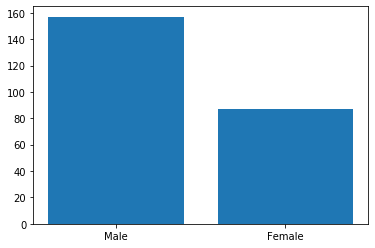

In [16]:
plt.bar(freq_table.index, freq_table)

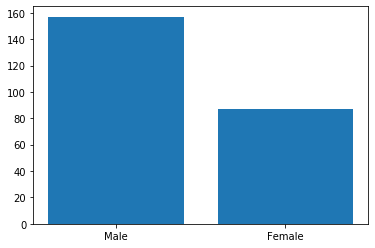

In [17]:
bars = plt.bar(freq_table.index, freq_table)

In [18]:
len(bars)

2

In [19]:
bars[0]

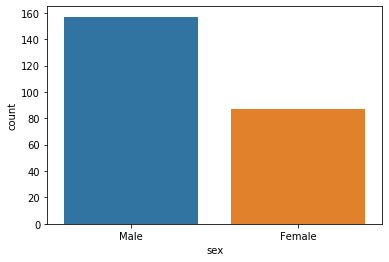

In [21]:
sns.countplot(tips.sex)

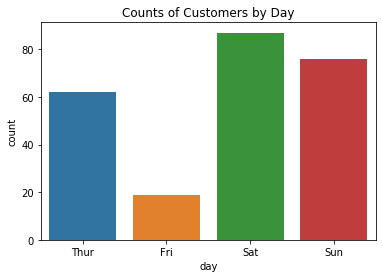

In [23]:
sns.countplot(tips.day)
plt.title('Counts of Customers by Day');

<BarContainer object of 4 artists>

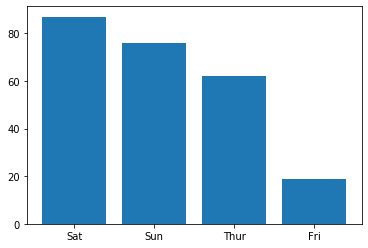

In [26]:
freq_table = tips.day.value_counts().sort_values(ascending = False)
plt.bar(freq_table.index, freq_table)

<BarContainer object of 4 artists>

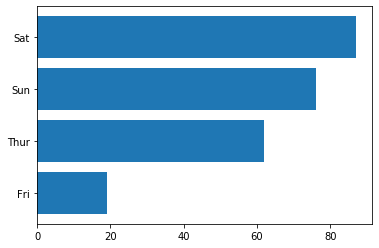

In [28]:
freq_table = tips.day.value_counts().sort_values()
plt.barh(freq_table.index, freq_table)

In [35]:
b2b_ex = tips.groupby(['day', 'sex']).mean().unstack()['total_bill']

In [36]:
b2b_ex.head()

sex        Male     Female
day                       
Thur  18.714667  16.715312
Fri   19.857000  14.145556
Sat   20.802542  19.680357
Sun   21.887241  19.872222

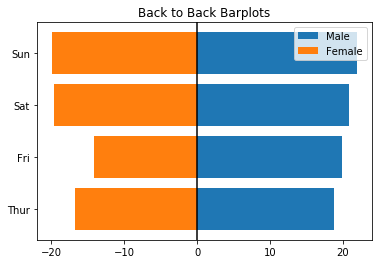

In [41]:
plt.barh(b2b_ex.index, b2b_ex['Male'], label = 'Male')
plt.barh(b2b_ex.index, -b2b_ex['Female'], label = 'Female')
plt.axvline(color = 'black')
plt.title('Back to Back Barplots')
plt.legend()

### Quantitative Data

- Histogram
 - shape
 - center
 - spread
 - outliers

In [45]:
tips.total_bill.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

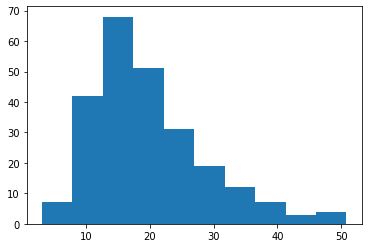

In [46]:
plt.hist(tips.total_bill)

In [49]:
median = tips.total_bill.median()

In [50]:
avg = tips.total_bill.mean()

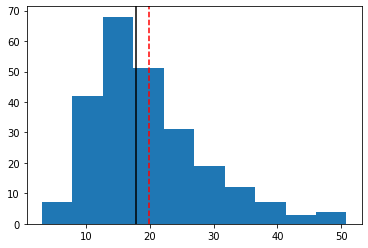

In [53]:
plt.hist(tips.total_bill)
plt.axvline(median, color = 'black')
plt.axvline(avg, linestyle = '--', color = 'red')

In [57]:
norm = np.random.normal(size = 500)

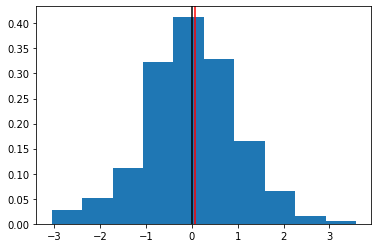

In [63]:
plt.hist(norm, density = True)
plt.axvline(norm.mean(), color = 'black')
plt.axvline(np.median(norm), color = 'red')

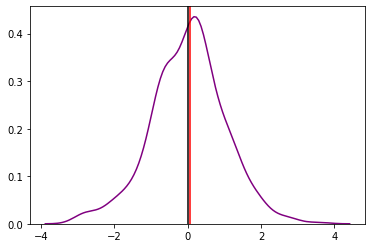

In [73]:
sns.distplot(norm, color = 'purple', hist = False)
plt.axvline(norm.mean(), color = 'black')
plt.axvline(np.median(norm), color = 'red')

##### Box Plots

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffd8221edd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffd82209dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffd8221e890>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffd82097690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffd82097bd0>],
 'means': []}

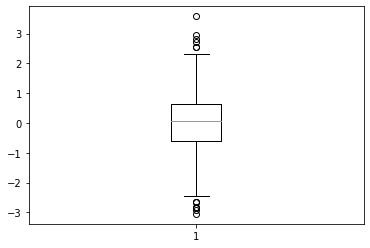

In [74]:
plt.boxplot(norm)

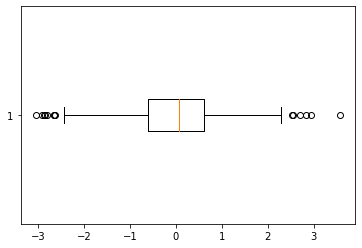

In [76]:
plt.boxplot(norm, vert = False);

In [80]:
pd.DataFrame(norm).describe().T

count      mean      std       min       25%       50%       75%       max
0  500.0  0.009377  1.01238 -3.050672 -0.610988  0.066392  0.621167  3.579947

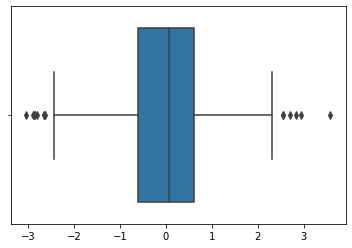

In [81]:
sns.boxplot(norm)

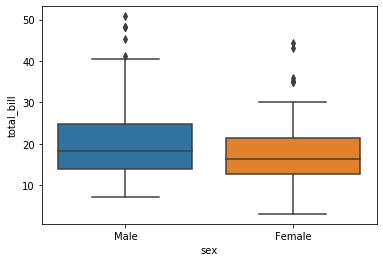

In [89]:
sns.boxplot(tips.sex, tips.total_bill)

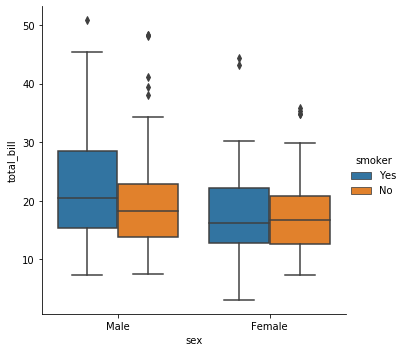

In [92]:
sns.catplot(x = 'sex', y = 'total_bill', hue = 'smoker', data = tips, kind = 'box')

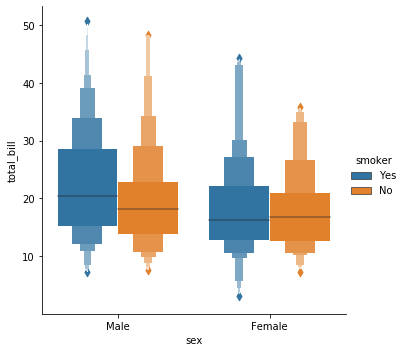

In [93]:
sns.catplot(x = 'sex', y = 'total_bill', hue = 'smoker', data = tips, kind = 'boxen')

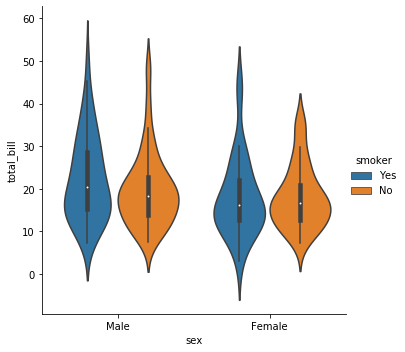

In [94]:
sns.catplot(x = 'sex', y = 'total_bill', hue = 'smoker', data = tips, kind = 'violin')

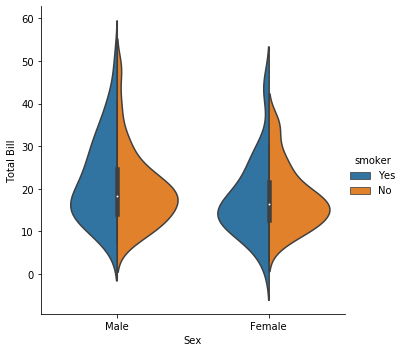

In [97]:
sns.catplot(x = 'sex', y = 'total_bill', hue = 'smoker', 
            data = tips, kind = 'violin',
           split = True)
plt.xlabel('Sex')
plt.ylabel('Total Bill');

##### PROBLEMS

1. Use the titanic data to construct a bar chart of categorical data.
2. Use the titanic data to construct a histogram of a quantitative feature.  Describe the shape, center, spread, and outliers of the data based on this plot.
3. Create a boxplot of the same data from 2.

**BONUS**

Create a 2 by 1 plot with boxplot on top and histogram on bottom where boxplot is half the height of the histogram.


In [98]:
titanic = sns.load_dataset('titanic')

In [99]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

### Multivariate Data

Categorical:

- side by side barchart
- stacked bar chart

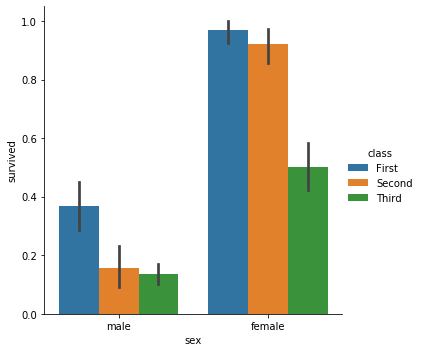

In [111]:
sns.catplot(x = 'sex', y = 'survived', hue = 'class', 
            kind = 'bar', data = titanic)

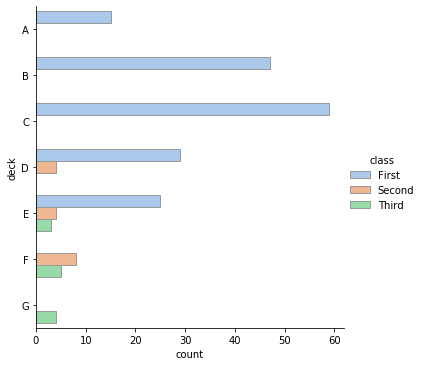

In [112]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);

##### PROBLEM

What would another example of a multivariate categorical plot from the tips data be?  

##### Multivariate Quantitative

In [102]:
ads = pd.read_csv('data/ads.csv', index_col = 0)

In [103]:
ads.head()

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

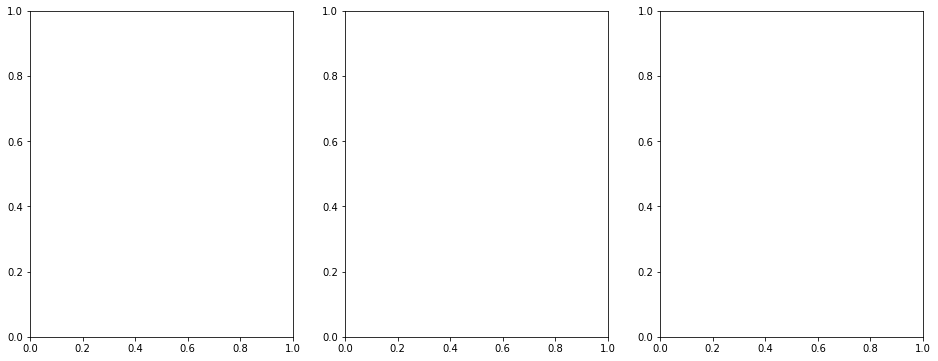

In [106]:
#create a 1 row by 3 column collection of scatterplots
#of advertising medium vs. sales
ax, fig = plt.subplots(1, 3, figsize = (16, 6))

In [107]:
#correlation


In [108]:
#heatmap


##### Problem

Use a heatmap to explore the data below.  What variable seems to be the highest correlation with Sales Price?

In [113]:
ames = pd.read_csv('data/ames_housing.csv')

In [114]:
ames.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]